In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,NaN,564.0,NaN,2,NaN,NaN,1.6,NaN,0.0,NaN
2,NaN,57.0,2.0,NaN,261.0,0.0,0,NaN,NaN,NaN,NaN,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,NaN,192.0,NaN,0,NaN,NaN,0.4,NaN,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	44
float64		column 2	44
float64		column 3	14
float64		column 4	56
float64		column 5	42
float64		column 6	42
int64		column 7	0
float64		column 8	70
float64		column 9	86
float64		column 10	86
float64		column 11	114
float64		column 12	28
float64		column 13	58


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,226.000000,226.000000,256.00000,214.000000,228.000000,228.000000,270.000000,200.000000,184.000000,184.000000,156.000000,242.000000,212.000000
mean,0.672566,54.438053,3.15625,131.995327,249.653509,0.153509,1.022222,149.865000,0.304348,1.077174,1.589744,0.681818,4.698113
std,0.470319,9.012986,0.94920,17.798164,52.196242,0.361270,0.997891,22.899096,0.461386,1.149683,0.620840,0.943420,1.938240
min,0.000000,29.000000,1.00000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.250000,3.00000,120.000000,212.750000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.00000,130.000000,244.500000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.00000,140.000000,276.250000,0.000000,2.000000,164.250000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.00000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

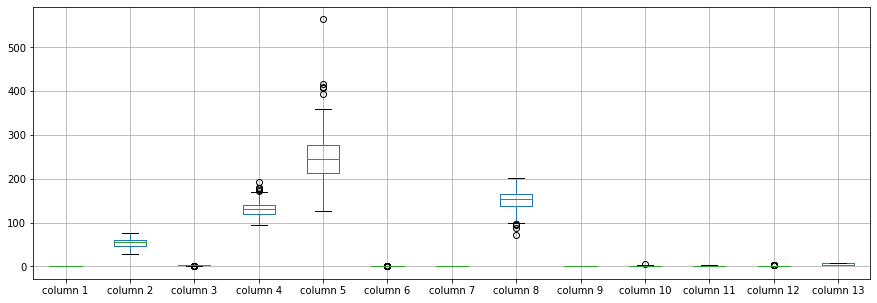

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.672566
column 2      54.438053
column 3       3.156250
column 4     131.995327
column 5     249.653509
column 6       0.153509
column 7       1.022222
column 8     149.865000
column 9       0.304348
column 10      1.077174
column 11      1.589744
column 12      0.681818
column 13      4.698113
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.067514,0.027434,-0.115375,-0.221361,0.096243,-0.018942,-0.027440,0.115801,0.022228,-0.002289,0.123797,0.346814
column 2,-0.067514,1.000000,0.120211,0.268208,0.121313,0.116511,0.154429,-0.477242,0.064659,0.262236,0.211245,0.345981,0.128288
column 3,0.027434,0.120211,1.000000,-0.032866,0.097330,-0.096971,0.077361,-0.257872,0.347100,0.194080,0.146182,0.243714,0.321233
column 4,-0.115375,0.268208,-0.032866,1.000000,0.141641,0.084293,0.078037,-0.035438,0.078441,0.251525,0.171665,0.028130,0.087915
column 5,-0.221361,0.121313,0.097330,0.141641,1.000000,0.000646,0.175074,-0.025087,0.143059,0.053831,-0.070484,0.062904,0.043906
column 6,0.096243,0.116511,-0.096971,0.084293,0.000646,1.000000,0.031166,0.127279,-0.018122,-0.047390,0.035477,0.108090,0.002312
column 7,-0.018942,0.154429,0.077361,0.078037,0.175074,0.031166,1.000000,-0.093858,0.075908,0.180427,0.225692,0.130037,-0.008324
column 8,-0.027440,-0.477242,-0.257872,-0.035438,-0.025087,0.127279,-0.093858,1.000000,-0.282515,-0.331986,-0.387855,-0.275564,-0.203622
column 9,0.115801,0.064659,0.347100,0.078441,0.143059,-0.018122,0.075908,-0.282515,1.000000,0.251274,0.269686,0.086178,0.300913
column 10,0.022228,0.262236,0.194080,0.251525,0.053831,-0.047390,0.180427,-0.331986,0.251274,1.000000,0.590862,0.244309,0.292091


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+105,13+105+105,13+105+105+105,13+105+105+105+105,13+105+105+105+105+105,13+105+105+105+105,13+105+105+105,13+105+105,13+105,13], vae_layer = False, seed = 105)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 489.87915420532227
Epoch: 1 , loss: 491.64537048339844
Epoch: 2 , loss: 495.4612293243408
Epoch: 3 , loss: 490.31954765319824
Epoch: 4 , loss: 488.8335723876953
Epoch: 5 , loss: 488.020845413208
Epoch: 6 , loss: 497.19324684143066
Epoch: 7 , loss: 485.38614654541016
Epoch: 8 , loss: 490.09820556640625
Epoch: 9 , loss: 491.37195777893066
Epoch: 10 , loss: 486.35478019714355
Epoch: 11 , loss: 480.67652320861816
Epoch: 12 , loss: 479.3667678833008
Epoch: 13 , loss: 477.3393325805664
Epoch: 14 , loss: 472.0480251312256
Epoch: 15 , loss: 472.30608558654785
Epoch: 16 , loss: 461.88715744018555
Epoch: 17 , loss: 441.28339195251465
Epoch: 18 , loss: 423.6554832458496
Epoch: 19 , loss: 409.5375499725342
Epoch: 20 , loss: 396.30727195739746
Epoch: 21 , loss: 390.2524814605713
Epoch: 22 , loss: 376.88171195983887
Epoch: 23 , loss: 364.6180992126465
Epoch: 24 , loss: 343.4956398010254
Epoch: 25 , loss: 329.9022789

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     122.102119
column 5     245.000000
column 6       0.186804
column 7       2.000000
column 8     137.323044
column 9       0.185317
column 10      0.200000
column 11      1.231695
column 12      0.000000
column 13      4.851843
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,-59.826382,0.000000,0.001537,0,-98.349968,0.218945,0.000000,-1.305055,0.0,-4.930021
2,-0.675559,0.0,0.0,17.697220,0.000000,0.000000,0,16.683121,0.372141,-0.140305,0.211940,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
266,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
267,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
268,0.000000,0.0,0.0,-48.065178,0.000000,0.166243,0,-44.709381,0.181919,0.000000,-1.072663,0.0,-2.291763


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1144.0937822022947, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.21129198517510317

In [18]:
new_df.iloc[66,:]

column 1       0.209165
column 2      53.341087
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       0.117246
column 10      0.691586
column 11      1.611477
column 12      0.000000
column 13      4.653978
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.0,4.0,130.000000,322.000000,0.000000,2,109.000000,0.000000,2.400000,2.000000,3.0,3.000000
1,0.000000,67.0,3.0,55.173618,564.000000,0.001537,2,61.650032,0.218945,1.600000,0.694945,0.0,2.069979
2,0.324441,57.0,2.0,141.697220,261.000000,0.000000,0,157.683121,0.372141,0.159695,1.211940,0.0,7.000000
3,1.000000,64.0,4.0,128.000000,263.000000,0.000000,0,105.000000,1.000000,0.200000,2.000000,1.0,7.000000
4,0.000000,74.0,2.0,120.000000,269.000000,0.000000,2,121.000000,1.000000,0.200000,1.000000,1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.0,3.0,172.000000,199.000000,1.000000,0,162.000000,0.000000,0.500000,1.000000,0.0,7.000000
266,1.000000,44.0,2.0,120.000000,263.000000,0.000000,0,173.000000,0.000000,0.000000,1.000000,0.0,7.000000
267,0.000000,56.0,2.0,140.000000,294.000000,0.000000,2,153.000000,0.000000,1.300000,2.000000,0.0,3.000000
268,1.000000,57.0,4.0,91.934822,192.000000,0.166243,0,103.290619,0.181919,0.400000,0.927337,0.0,3.708237


In [20]:
imputations[-1].to_excel("Sheart_AN_20(imp).xlsx", index=False, header=False)